In [0]:
%reload_ext autoreload
%autoreload 2

import torch
import fastai
from fastai import vision
from fastai import widgets as util

In [0]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device:', device)

fastai.core.defaults.device = torch.device(device)

if device == 'cuda':
    vision.torch.backends.cudnn.benchmark = True

device: cuda


In [0]:
# dir(vision.URLs)

In [0]:
path = vision.untar_data(vision.URLs.DOGS)
path

PosixPath('/root/.fastai/data/dogscats')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/dogscats/test1'),
 PosixPath('/root/.fastai/data/dogscats/valid'),
 PosixPath('/root/.fastai/data/dogscats/sample'),
 PosixPath('/root/.fastai/data/dogscats/train')]

In [0]:
training_path = path/'train'
training_path.ls()

[PosixPath('/root/.fastai/data/dogscats/train/cats'),
 PosixPath('/root/.fastai/data/dogscats/train/dogs')]

In [0]:
data = vision.ImageDataBunch.from_folder(path, train='train', valid='valid',
                                         ds_tfms = vision.get_transforms(),
                                         size=224,
                                         bs=32, seed=1).normalize(vision.imagenet_stats)

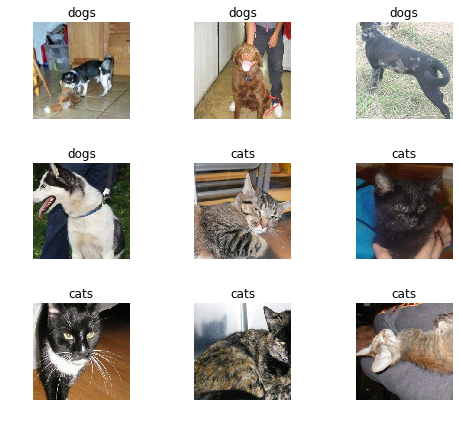

In [0]:
data.show_batch(3, figsize=(7, 6))

In [0]:
learner = vision.learner.cnn_learner(data, 
                                     vision.models.resnet18, 
                                     metrics=[vision.error_rate, vision.accuracy]).to_fp32()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 81833510.66it/s]


In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


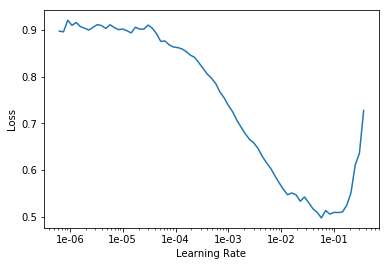

In [0]:
learner.recorder.plot(suggestion=True)

In [0]:
lr = 1e-2
learner.fit_one_cycle(cyc_len=5, max_lr=slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.103743,0.045032,0.018000,0.982000,05:27
1,0.090443,0.056320,0.017500,0.982500,05:28
2,0.056767,0.048809,0.012000,0.988000,05:29
3,0.040225,0.027291,0.009000,0.991000,05:28
4,0.035930,0.025909,0.008500,0.991500,05:28


In [0]:
learner.save('Dog_Cat classifier')